# Naive Bayes

In [14]:
import numpy as np
import pandas as pd
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import evaluate

In [17]:
warnings.filterwarnings('ignore')

train = pd.read_csv('Dataset/train_preprocessing.csv')
test = pd.read_csv('Dataset/test_preprocessing.csv')
gender_submission = pd.read_csv('Dataset/gender_submission.csv')
# Merge the test dataframe with the gender_submission dataframe on 'PassengerId'
test = pd.merge(test, gender_submission[['PassengerId', 'Survived']], on='PassengerId', how='left')
test = test.drop(['Survived_x'], axis = 1)
test.rename(columns={'Survived_y': 'Survived'}, inplace=True)
print(test.head())
train = train[train['Survived'] != 'U']
test = test[test['Survived'] != 'U']
data = pd.concat([train, test])

   Unnamed: 0  index  PassengerId  Pclass  \
0         893      2          894       2   
1         894      3          895       3   
2         895      4          896       3   
3         896      5          897       3   
4         897      6          898       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                     Myles, Mr. Thomas Francis    1  62.0      0      0   
1                              Wirz, Mr. Albert    1  27.0      0      0   
2  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0  22.0      1      1   
3                    Svensson, Mr. Johan Cervin    1  14.0      0      0   
4                          Connolly, Miss. Kate    0  30.0      0      0   

    Ticket     Fare  Cabin  Embarked  Title  Survived  
0   240276   9.6875      8         1      2         0  
1   315154   8.6625      8         2      2         0  
2  3101298  12.2875      8         2      3         1  
3     7538   9.2250      8         2      2     

In [12]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']].values
Y_train = train[['Survived']].values
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']].values
Y_test = test[['Survived']].values

numpy.ndarray

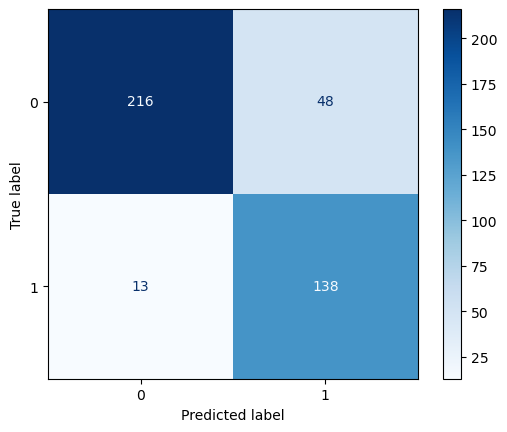

Accuracy: 0.8530120481927711
Precision: 0.8699888156655359
Recall: 0.8530120481927711
F1 Score: 0.8554273286378975


In [11]:
# Model
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
evaluate.evaluate(Y_test, Y_pred.astype(float),1)